In [19]:
import numpy as np
import matplotlib.pyplot as plt
pt = 4/3
halfsize = (3, 3/1.618)
fullsize = (5, 5/1.618)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [20]:
def potf(x):
    return 0*x

def potpot(x):
    return 0*x

def potq(x):
    return 10*x**2/2

def step(x,pot,dx=1):
    dx = np.random.choice([-1,1],len(x))*dx
    return x + (np.random.random(len(x))<np.exp(-pot(x+dx)+pot(x)))*dx

In [21]:
def plot_sim(x):
    msd = np.average(x**2,axis=1)
    fig,ax = plt.subplots(2,1)
    for j in range(0,x.shape[1]):
        ax[0].plot(x[:,j])
    ax[1].plot(msd)

def do_sim(num_steps,num_traj,pot,xinit=0):
    x = np.ones((num_steps,num_traj))*xinit
    for i in range(1,num_steps):
        x[i] = step(x[i-1],pot)
    return x

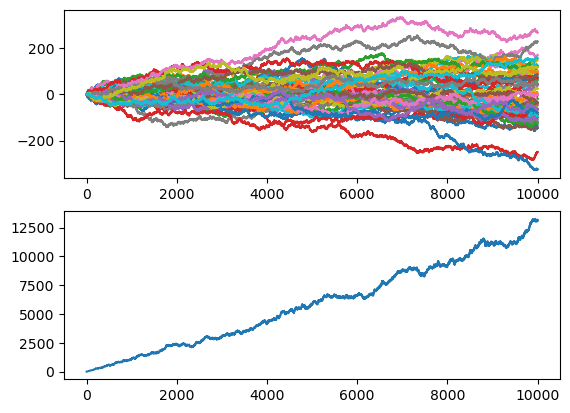

In [22]:
plot_sim(do_sim(10000,50,potf))

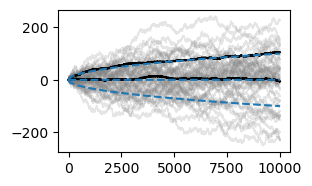

In [24]:
plt.figure(figsize=halfsize)
traces = do_sim(10000,50,potf)
for t in traces.T:
	plt.plot(t, color="gray", lw=1, alpha=0.2)
plt.plot(np.average(traces, axis=1), color="black")
plt.plot(np.std(traces, axis=1), color="black")
plt.plot(np.zeros_like(traces[:,1]), ls="dashed", color=colors[0])
plt.plot(np.sqrt(np.arange(traces.shape[0])), ls="dashed", color=colors[0])
plt.plot(-np.sqrt(np.arange(traces.shape[0])), ls="dashed", color=colors[0])
plt.savefig("../figures/01 time trace.pdf")
plt.show()

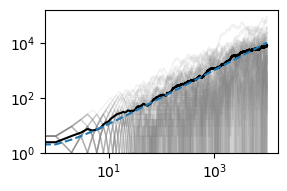

In [18]:
msd = np.average(traces**2,axis=1)
plt.figure(figsize=halfsize)
for t in traces.T:
	plt.plot(t[1::]**2, color="gray", lw=1, alpha=0.1)
plt.plot(msd[1::], color="black")
plt.plot(np.arange(len(msd))[1::], ls="dashed", color=colors[0])
plt.xscale("log")
plt.yscale("log")
plt.ylim(bottom=msd[1::].min())
plt.savefig("../figures/01 msd.pdf")
plt.show()